# Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in prediction 

In [1]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [2]:
from sklearn import neighbors
n_neighbors = 11 # the numbner of nearest neighbors (also known as k)
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.93333333 1.         1.         0.96666667 1.        ]


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [3]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

Classification score of k-nn with distance weighting
[0.96666667 1.         1.         0.96666667 1.        ]


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors: 1
Accuracy: 0.9166666666666666
k neighbors: 2
Accuracy: 0.9166666666666666
k neighbors: 3
Accuracy: 0.9333333333333333
k neighbors: 4
Accuracy: 0.9166666666666666
k neighbors: 5
Accuracy: 0.95
k neighbors: 6
Accuracy: 0.9333333333333333
k neighbors: 7
Accuracy: 0.9666666666666667
k neighbors: 8
Accuracy: 0.9333333333333333
k neighbors: 9
Accuracy: 0.9666666666666667
k neighbors: 10
Accuracy: 0.9666666666666667
k neighbors: 11
Accuracy: 0.9666666666666667
k neighbors: 12
Accuracy: 0.9666666666666667
k neighbors: 13
Accuracy: 0.9666666666666667
k neighbors: 14
Accuracy: 0.95
k neighbors: 15
Accuracy: 0.95
k neighbors: 16
Accuracy: 0.9166666666666666
k neighbors: 17
Accuracy: 0.9333333333333333
k neighbors: 18
Accuracy: 0.9166666666666666
k neighbors: 19
Accuracy: 0.9166666666666666
k neighbors: 20
Accuracy: 0.9166666666666666
k neighbors: 21
Accuracy: 0.9166666666666666
k neighbors: 22
Accuracy: 0.9166666666666666
k neighbors: 23
Accuracy: 0.9166666666666666
k neighbors: 24


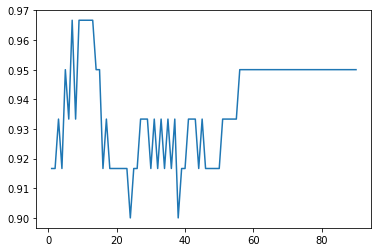

In [4]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index = n_neighbors-1
    A[index] = clf_knn3.score(X_test, y_test)
    if best_accuracy < clf_knn3.score(X_test, y_test):
        best_accuracy = clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors: " + str(n_neighbors))
    print("Accuracy: " + str(clf_knn3.score(X_test, y_test)))
    
print("\nBest k: " + str(best_k))
print("Best accuracy: " + str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

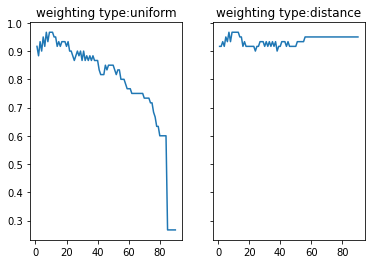

In [5]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)



best k=7
best accuracy=0.9666666666666667


best k=7
best accuracy=0.9666666666666667


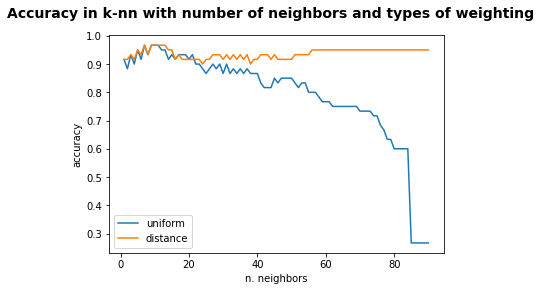

In [6]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')
A=np.zeros((len(y_train),2), dtype=float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blue for Versicolor, Green for Virginica.


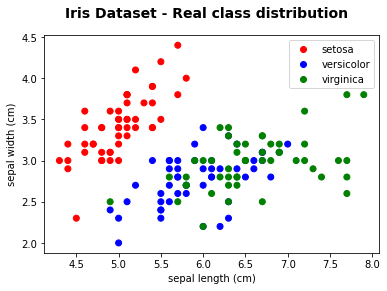

In [7]:
from matplotlib.colors import ListedColormap

# Since it is impossible to print a 4-D plot e are going to consider just the first 2 features
plot_data = iris.data[:,:-2]
point_colors = ListedColormap(['red', 'blue', 'green'])

fig,ax = plt.subplots()
fig.suptitle('Iris Dataset - Real class distribution', fontsize=14, fontweight='bold')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

# Since we need to get the column vectors for the x's and y's we perform the transpose on the plot data
plot_data_trans = plot_data.T

# c = class, cmap=colormap
scatter = ax.scatter(plot_data_trans[0], plot_data_trans[1], c=iris.target, cmap=point_colors)
ax.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())


## What you have to do: 
1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


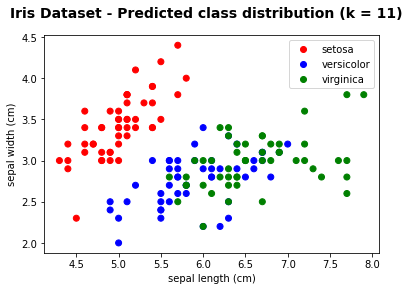

In [8]:

n_neighbors = 11
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn = clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(iris.data)


fig,ax = plt.subplots()
fig.suptitle('Iris Dataset - Predicted class distribution (k = ' + str(n_neighbors) + ')', fontsize=14, fontweight='bold')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

scatter = ax.scatter(plot_data_trans[0], plot_data_trans[1], c=y_pred, cmap=point_colors)
ax.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())

2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor

Text(0.5, 1.0, 'ROC Curve: k-NN classifier')

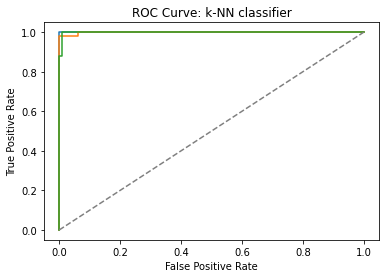

In [9]:
# Compute the ROC plot using scores, without considering every possible threshold
# Parameters:
#   - scores: An array obtained from predict_proba with scores assigned to each class
#   - actual: An array containing the real class assigned to every instance
#   - positive_class: Index of the class considered positive (defaults to 0) 
# Return:
#   - An array containing the coordinates of points that represent the ROC curve
def scoring_roc(scores, actual, positive_class = 0):
    # Take only the column vector of scores corresponding to the positive
    # class, then order it in a decreasing order, by keeping only the permutation
    # of indexes that lead to the ordered sequence
    sorted_indexes = np.argsort(-scores[:, positive_class])

    # Compute positives and negatives
    # Positives are only considered if class = positive_class, all the remaining
    # ones are considered as negatives
    pos = sum(actual == positive_class)
    neg = actual.size - pos # Neg = |D| - Pos 
    
    # We can now proceed to compute the actual ROC plot
    # Let's start from the origin (0, 0)
    x, y = 0, 0
    roc_points = [[x, y]]

    # Consider the instances in a specific order
    for si in sorted_indexes:
        if actual[si] == positive_class:
            # Correctly classified, move up
            y += (1 / pos)
        else:
            # Incorrectly classified, move right 
            x += (1 / neg)
        roc_points.append([x, y])
    # Return points as a numpy array since its more convenient to use
    return np.array(roc_points)


# Predict the probabilities
y_actual = iris.target
y_pred = clf_knn.predict_proba(iris.data)

# Print the ROC curve of each class
for positive_class in range(0, y_pred.shape[1]):
    roc_curve = scoring_roc(y_pred, y_actual, positive_class)
    plt.plot(roc_curve[:,0], roc_curve[:, 1])

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: k-NN classifier')


3. Plot the ROC plot for the best decision tree you trained in Exercize n.1  
4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees? (**TODO**)

Text(0.5, 1.0, 'ROC Curve: Tree classifier')

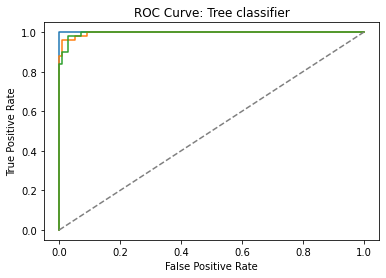

In [10]:
# Predict the probabilities
y_actual = iris.target
y_pred = clf.predict_proba(iris.data)

# Print the ROC curve of each class
for positive_class in range(0, y_pred.shape[1]):
    roc_curve = scoring_roc(y_pred, y_actual, positive_class)
    plt.plot(roc_curve[:,0], roc_curve[:, 1])

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Tree classifier')

5. In the following, extend the above exercise on k-nn using a kernel function  
K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

Best (sigma, score): (0.1, 0.9666666666666667)


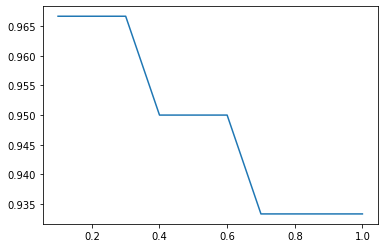

In [11]:
# First thing first, we define the Kernel function
def kernel(x, y, sigma):
    gamma = 1/(2*(sigma ** 2))
    return np.exp(-(np.linalg.norm(x - y) ** 2)*(gamma))

# Now we use the kernel to compute the actual distance
def distance(x, y, sigma):
    return 1 - kernel(x,y,sigma)

n_neighbors = 7
scores = []                         # ..to save scores later
sigmas = np.linspace(0.1, 1, 10)    # consider 10 points between 0.1 and 1 
    
best_sigma, best_score = 0, 0
    
for sigma in sigmas:
    dist = lambda x, y: distance(x, y, sigma)     # Create a partially applied distance function `dist`
    kernelized_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric=dist).fit(X_train, y_train)
    score = kernelized_knn.score(X_test, y_test)
    scores.append(score)
    if(score > best_score): # update best score and sigma accordingly
        best_sigma, best_score = sigma, score


print(f'Best (sigma, score): ({best_sigma}, {best_score})')
plt.plot(sigmas, scores)